In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets
%matplotlib inline

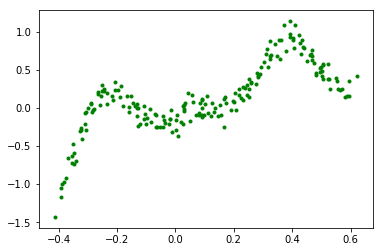

In [3]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [4]:
hidden_1 = 2
net = tnn.AutoForm(new_layers=True)

optimizer = tnn.Adam(learning_rate=0.003)
layer1 = tnn.LinearLayer(1, hidden_1, optimizer=optimizer)
layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
# layer2 = tnn.Relu()
layer3 = tnn.LinearLayer(hidden_1, 1, optimizer=optimizer)

# a1 = layer1.forward(train_data)
# a2 = layer2.forward(a1)
# a3 = layer3.forward(a2)

_______________________
epoch 0
Loss 0.45824769834378287

_______________________
epoch 100
Loss 0.07212884685095095

_______________________
epoch 200
Loss 0.045613880227140594

_______________________
epoch 300
Loss 0.0441088354713346

_______________________
epoch 400
Loss 0.04329923777065769

_______________________
epoch 500
Loss 0.04285379564665675

_______________________
epoch 600
Loss 0.04265949849981046

_______________________
epoch 700
Loss 0.0425590247951969

_______________________
epoch 800
Loss 0.042505297833121264

_______________________
epoch 900
Loss 0.042464630372651906

_______________________
epoch 1000
Loss 0.04243403226429145

_______________________
epoch 1100
Loss 0.042410099802306964

_______________________
epoch 1200
Loss 0.042401093166578814

_______________________
epoch 1300
Loss 0.042399262373998534

_______________________
epoch 1400
Loss 0.04239806937505874

_______________________
epoch 1500
Loss 0.0423972277945022

_______________________
epoch 160

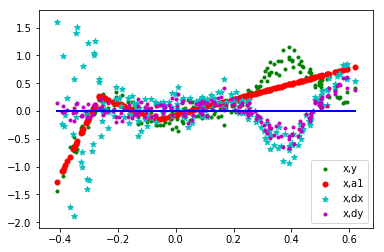

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    yout = net.forward(xx)
    
    loss = tnn.MseLoss.loss(yout, yy)
    dy = tnn.MseLoss.del_loss(yout, yy)
    
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

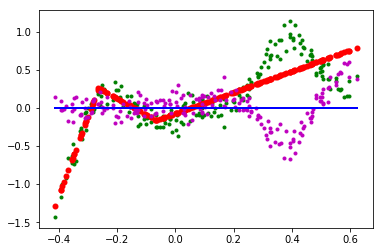

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
# plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [10]:
i=-1
layer3.input.shape

(200, 2)

(-0.0028449877468948613, 0.10807045624968016)

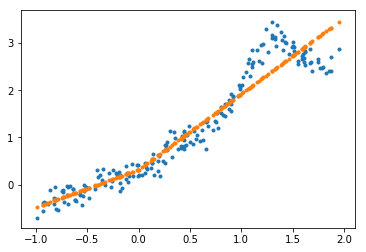

In [11]:
i+=1
a1 = layer2.input #x
# a1 = layer2.x
a2 = layer3.input
da2 = layer2.del_output
a2_ = a2 - da2
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
da2[:,i].mean(), da2[:,i].var()

In [ ]:
da2.mean(axis=0)

In [ ]:
da2.std(axis=0)